<a href="https://colab.research.google.com/github/ZeroAthena/SimMat02025/blob/main/Tarea_2_2_Simulaci%C3%B3n_de_escenarios_futuros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Objetivo:**

Importar los precios de Amazon desde Yahoo finance de los últimos 10 años y simular cien mil escenarios de los próximos 30 días para predecir la probabilidad de que el precio actual supere el 8%.

In [2]:
import pandas as pd
import numpy as np
import yfinance as yf

/tmp/ipython-input-742675740.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(ticker,start='2015-11-04',end='2025-11-04')['Close'] #Extraemos los precios ajustados al cierre de los últimos 10 años
[*********************100%***********************]  1 of 1 completed


<Axes: >

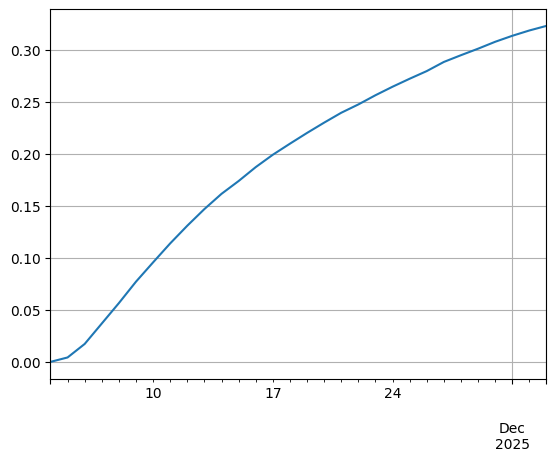

In [27]:
#Descargamos el ticker de Amazon (AMZN)
ticker='AMZN'
data=yf.download(ticker,start='2015-11-04',end='2025-11-04')['Close'] #Extraemos los precios ajustados al cierre de los últimos 10 años
delta=data.pct_change().dropna() #Cambios del precio en cada día

#Simulamos los deltas
N_dias=30 #Simulamos 30 días
N_escenarios=100000 #100,000 escenarios
delta_AMZN=np.random.normal(delta['AMZN'].mean(),delta['AMZN'].std(),(N_dias,N_escenarios))
rango_tiempo=pd.date_range('2025-11-04',periods=N_dias)

delta_AMZN=pd.DataFrame(delta_AMZN,index=rango_tiempo) #Asignamos fechas a cada simulación
precios_AMZN=data['AMZN'].iloc[-1]*((delta_AMZN+1).cumprod()) #Asignamos precios con cambio a cada día

#Probabilidad de que el precio actual supere el 8%
B_AMZN=precios_AMZN>data['AMZN'].iloc[-1]*1.08
proba_AMZN=B_AMZN.mean(axis=1)
proba_AMZN.plot(grid=True)

In [30]:
proba_AMZN.mean()*100

np.float64(19.2301)

#**Resultados:**

La simulación arrojó que un $19.23\%$ de los casos simulados, de $100,000$ a partir del 4 de noviembre de 2025, lograron rebasar el 8% del precio de la fecha indicada.